In [1]:
# importing necessary libraries
import numpy as np
from matplotlib import pyplot as plt
from qiskit import *
from qiskit.circuit import Parameter

In [2]:
# storing all Pauli matrices (i, z, x, y)
pauli = np.array([[[1,0],[0,1]], [[1,0],[0,-1]], [[0,1],[1,0]], [[0,-1j],[1j,0]]])
print('pauli matrices:')
print(pauli)

pauli matrices:
[[[ 1.+0.j  0.+0.j]
  [ 0.+0.j  1.+0.j]]

 [[ 1.+0.j  0.+0.j]
  [ 0.+0.j -1.+0.j]]

 [[ 0.+0.j  1.+0.j]
  [ 1.+0.j  0.+0.j]]

 [[ 0.+0.j -0.-1.j]
  [ 0.+1.j  0.+0.j]]]


In [3]:
# finding kronecker product of Pauli matrices with themselves for creating hamiltonian
ii = np.kron(pauli[0], pauli[0])
zz = np.kron(pauli[1], pauli[1])
xx = np.kron(pauli[2], pauli[2])
yy = np.kron(pauli[3], pauli[3])

In [4]:
# Printing eigenvalues and eigenvectors of all component matrices
print('ii:\neigenvalues: ', np.linalg.eig(ii)[0], '\neigenvectors\n',np.linalg.eig(ii)[1])
print()
print('zz:\neigenvalues: ', np.linalg.eig(zz)[0], '\neigenvectors\n',np.linalg.eig(zz)[1])
print()
print('xx:\neigenvalues: ', np.linalg.eig(xx)[0], '\neigenvectors\n',np.linalg.eig(xx)[1])
print()
print('yy:\neigenvalues: ', np.linalg.eig(yy)[0], '\neigenvectors\n',np.linalg.eig(yy)[1])

ii:
eigenvalues:  [1.+0.j 1.+0.j 1.+0.j 1.+0.j] 
eigenvectors
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

zz:
eigenvalues:  [ 1.+0.j -1.+0.j -1.+0.j  1.-0.j] 
eigenvectors
 [[1.+0.j 0.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 1.+0.j 0.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 1.+0.j 0.+0.j]
 [0.+0.j 0.+0.j 0.+0.j 1.+0.j]]

xx:
eigenvalues:  [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j] 
eigenvectors
 [[ 0.70710678-0.j  0.70710678+0.j -0.        -0.j -0.        -0.j]
 [-0.        -0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [-0.        -0.j  0.        +0.j  0.70710678-0.j -0.70710678-0.j]
 [ 0.70710678+0.j -0.70710678+0.j -0.        -0.j -0.        -0.j]]

yy:
eigenvalues:  [ 1.+0.j -1.+0.j  1.+0.j -1.+0.j] 
eigenvectors
 [[-0.70710678+0.j  0.70710678+0.j -0.        -0.j  0.        +0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678+0.j  0.70710678+0.j]
 [ 0.        +0.j  0.        +0.j  0.70710678-0.j -0.70710678+0.j]
 [ 0.70710678

In [5]:
# dictionary for mapping measurement outcome to 
# eigenvalues of component matrices of hamiltonian
eig_values = [{'00':1, '01':1, '10':1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1},
              {'00':1, '01':-1, '10':-1, '11':1}]

In [6]:
# generating the Hamiltonian matrix
print('Hamiltonian whose eigenvalue is to be found:')
hamiltonian = 1/2*(ii + zz) - 1/2*(xx + yy)
print(hamiltonian)

# Creating a lambda expression for easy calculation of 
# expectation value of hamiltonian. Takes argument: a, list of 
# expectations of all components of hamiltonian matrix
calculate_expectation = lambda a: 1/2*(a[0] + a[1]) - 1/2*(a[2] + a[3])

Hamiltonian whose eigenvalue is to be found:
[[ 1.+0.j  0.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j -1.+0.j  0.+0.j]
 [ 0.+0.j -1.+0.j  0.+0.j  0.+0.j]
 [ 0.+0.j  0.+0.j  0.+0.j  1.+0.j]]


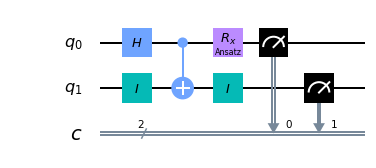

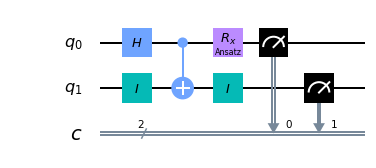

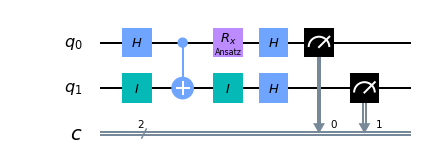

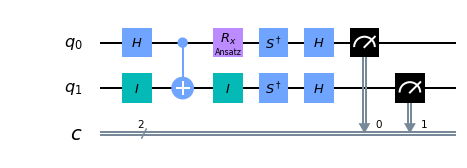

In [7]:
# Creating a list of circuits for each of the component matrices
qc = [QuantumCircuit(2, 2) for _ in range(4)]
 
# Creating parameter object to be fed to Rx in Ansatz
param = Parameter('Ansatz')
 
# Initializing Ansatz in all component circuits
for i in range(4):  
    qc[i].h(0)
    qc[i].i(1)
    qc[i].cx(0,1)
    qc[i].rx(param, 0)
    qc[i].i(1)
    
# Adding provisions for measurement in x basis
qc[2].h([0,1])

# Adding provisions for measurement in y basis
qc[3].sdg([0,1])
qc[3].h([0,1])
 
# adding measurements and finally, displaying all circuits
for i in range(4):
    qc[i].measure([0,1],[0,1])
    display(qc[i].draw('mpl'))

In [8]:
# The following parameters need to be set for running the algorithm:
#    :num_angles : number of angles to search through
#    :num_shots  : number of shots of each quantum circuit
 
num_angles = 100
num_shots = 100
 
# creating a list of num_angles between 0 and 2π
angles = np.linspace(0, 2*np.pi, num_angles)
 
# we use qasm simulator to find the number of counts of each measurement outcome
sim = Aer.get_backend('qasm_simulator')
 
# executing all 4 circuits for every angle in list angles and store in list output
output = []
for i in angles:
    out = []
    for circuit in qc:
        circuit = circuit.assign_parameters({param: i})
        result = execute(circuit, sim, shots = num_shots).result()
        out.append(result.get_counts(circuit))
    output.append(out)

In [9]:
# finding the minimum expectation value of the Hamiltonian using the
# list output (measurement outcomes) from previous cell.
 
# first, for every angle, average of measurement output, mapped to the
# eigenvalue of the respective component is found. 
# The average values are substituted in the equation of the Hamiltonian (using lambda expression 
# calculate_expectation). This gives the expectation value of the whole Hamiltonian for that angle. 
 
# The value of the expectations of the Hamiltonian are stored in list final.
 
# The minimum value of the expectation of the Hamiltonian is stored in 
# min_eigen and the index of the final occurence of the minimum eigenvalue 
# (corresponding to the list output) is stored in min_eigen_index.
 
final = []
min_eigen = 100
 
for i in range(num_angles):
    out2 = []
    for j in range(4):
        avg = 0
        for key, value in output[i][j].items():
            avg += eig_values[j][key]*value
        out2.append(avg/num_shots)
 
    final.append(calculate_expectation(out2))
    if final[-1] <= min_eigen:
        min_eigen = final[-1]
        min_eigen_index = i

min_angle = str(2*min_eigen_index/num_angles)+'\u03C0'
print('Minimum eigenvalue: ', min_eigen)
print('Eigenvalue minimum at angle: ', min_angle)
print("(note that the above angle corresponds to the final occurence of the minimum eigenvalue)")

Minimum eigenvalue:  -1.0
Eigenvalue minimum at angle:  1.02π
(note that the above angle corresponds to the final occurence of the minimum eigenvalue)


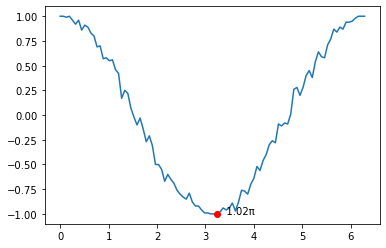

In [10]:
# Plotting the expectations of the Hamiltonian and marking
# the minimum eigenvalue point (last occurence of min. eigenvalue)  
# on the plot along with the parameter of the Ansatz used.
 
plt.plot(angles, final)
plt.plot(angles[min_eigen_index], min_eigen, 'ro')
plt.text(angles[min_eigen_index], min_eigen, '   '+min_angle)
plt.show()

# Interpreting the results:
The ansatz ((Rx I) CX (HI) |00>) first forms the bell state in the CX(HI)|00> step. 

The state of the system is now ``|00> + |11>``


The (Rx I) is then used to vary the qubit 0 to search for Ψ corresponding to the minimum eigenvalue of the hamiltonian. 

The above result shows that the optimal value of parameter of Rx is ≈ π. 

So, applying the Rx gate on the qubit 0 of the bell state, with angle π, basically flips the qubit, resulting in state:
``|01> + |10>`` which is another bell state. 

So below, is a proof of the above claim by creating the ``|01> + |10>`` state and making measurements, without any parameter being involved.

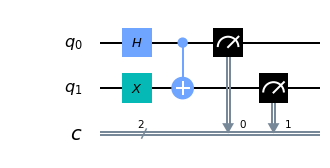

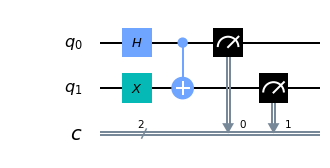

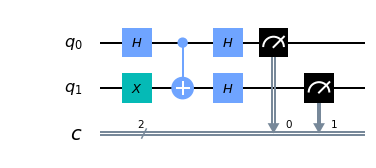

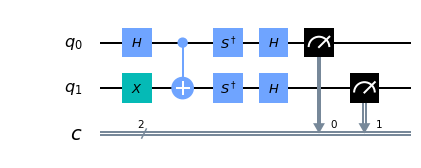

In [11]:
qc1 = [QuantumCircuit(2, 2) for _ in range(4)]
 
# Initializing all component circuits to state |01> + |10>
for i in range(4):
    qc1[i].x(1)
    qc1[i].h(0)
    qc1[i].cx(0,1)
    
# Adding provisions for measurement in x basis
qc1[2].h([0,1])

# Adding provisions for measurement in y basis
qc1[3].sdg([0,1])
qc1[3].h([0,1])
 
# adding measurements and finally, displaying all circuits
for i in range(4):
    qc1[i].measure([0,1],[0,1])
    display(qc1[i].draw('mpl'))

In [12]:
num_shots = 100
outputs = []
for circuit in qc1:
    result = execute(circuit, sim, shots = num_shots).result()
    outputs.append(result.get_counts(circuit))
print('The measurement outcomes by running the 4 circuits are:')
print(outputs)

The measurement outcomes by running the 4 circuits are:
[{'10': 44, '01': 56}, {'10': 46, '01': 54}, {'00': 46, '11': 54}, {'00': 58, '11': 42}]


In [13]:
out3 = []
for j in range(4):
    avg = 0
    for key, value in outputs[j].items():
        avg += eig_values[j][key]*value
    out3.append(avg/num_shots)
print('predicted  eigenvalue =', calculate_expectation(out3))

predicted  eigenvalue = -1.0


The above result hence proves our claim.

# Verifying the answer

We will now verify the answer obtained above by finding the eigenvalue using classical methods.

In [14]:
eigenvalues, eigenvectors = np.linalg.eigh(hamiltonian)
print('eigenvalues: ', eigenvalues, '\neigenvectors\n',eigenvectors)
print()
print('minimum eigenvalue = ', min(eigenvalues))

eigenvalues:  [-1.  1.  1.  1.] 
eigenvectors
 [[-0.        +0.j  0.        +0.j  1.        +0.j  0.        +0.j]
 [-0.70710678+0.j -0.70710678+0.j  0.        +0.j  0.        +0.j]
 [-0.70710678+0.j  0.70710678+0.j  0.        +0.j  0.        +0.j]
 [-0.        +0.j  0.        +0.j  0.        +0.j  1.        +0.j]]

minimum eigenvalue =  -1.0


Thus, we see that the quantum and classical results are consistent with each other.